In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(style="darkgrid")

In [2]:
files=os.listdir('/home/arturo/documents/diplomado/Diplomado-CienciadeDatos/modulo3/csv/ecobici')

In [3]:
lst_df = []
for i in files:
    print(i)
    aux = pd.read_csv(os.path.join('./csv/ecobici',i))
    lst_df.append(aux)
df = pd.concat(lst_df,ignore_index=True)
del lst_df
del aux

2019-04.csv
2019-09.csv
2018-07.csv
2018-10.csv
2019-05.csv
2019-10.csv


/home/arturo/virtualenv/ml/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2018-02.csv
2017-11.csv
2018-06.csv
2019-01.csv
2019-08.csv
2018-12.csv
2018-08.csv
2019-03.csv


/home/arturo/virtualenv/ml/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (2,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2017-12.csv
2019-06.csv
2018-09.csv
2019-07.csv
2019-02.csv
2018-05.csv
2018-11.csv
2018-03.csv
2018-04.csv
2018-01.csv


<ipython-input-3-11b718221a57>:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat(lst_df,ignore_index=True)


In [4]:
df.shape

(17104573, 10)

In [5]:
df.drop(columns=["Unnamed: 9"],inplace=True)

prueba de bondad de ajuste
- kolmogorov
- chi 2

In [6]:
df.head()

,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Arribo,Hora_Retiro
0,2388,323,378,28,01/04/2019,01/04/2019,M,00:09:01,00:00:06
1,8272,288,309,27,01/04/2019,01/04/2019,M,00:03:13,00:00:09
2,4058,321,277,23,01/04/2019,01/04/2019,M,00:09:42,00:00:31
3,7716,137,120,22,01/04/2019,01/04/2019,M,00:04:18,00:01:04
4,3982,163,32,33,01/04/2019,01/04/2019,F,00:17:36,00:03:49


In [14]:
#est=df["Ciclo_Estacion_Arribo"].drop_duplicates().sample(frac=.01)
arr=df["Ciclo_Estacion_Arribo"].drop_duplicates().values

In [27]:
arr=np.unique(np.delete(arr,964).astype(int))

In [33]:
arr=arr[arr<481]

In [37]:
df=df[df["Edad_Usuario"]<66]

In [38]:
df_muestra=df[df["Ciclo_Estacion_Arribo"].isin(arr)].sample(frac=.01)

In [39]:
df_muestra.shape

(168797, 9)

In [40]:
df_muestra.to_csv("./csv/bicimuestra2.csv")

In [75]:
df=pd.read_csv("./csv/bicimuestra.csv")

/home/arturo/virtualenv/ml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [78]:
df["Edad_Usuario"][df["Edad_Usuario"]<120].describe(percentiles = [x/10 for x in range(10)] + [0.01, 0.05, 0.95, 0.99])

count    170590.000000
mean         34.947084
std          10.308479
min          16.000000
0%           16.000000
1%           19.000000
5%           23.000000
10%          24.000000
20%          27.000000
30%          28.000000
40%          30.000000
50%          32.000000
60%          35.000000
70%          38.000000
80%          43.000000
90%          50.000000
95%          56.000000
99%          65.000000
max         119.000000
Name: Edad_Usuario, dtype: float64

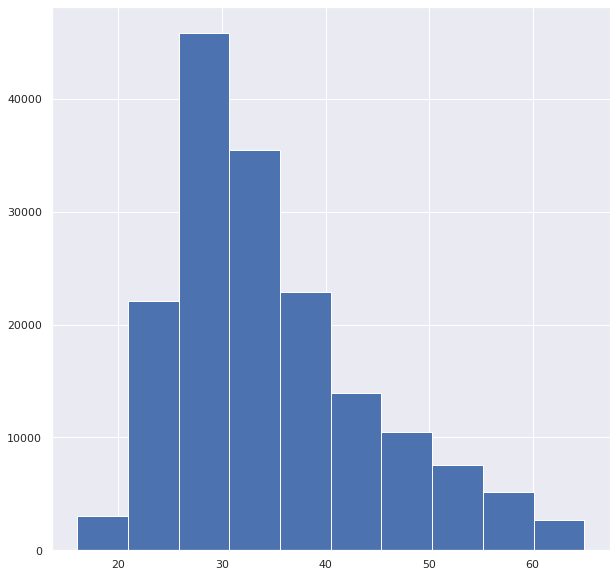

In [79]:
df["Edad_Usuario"][df["Edad_Usuario"]<66].hist(figsize=(10,10))

In [85]:
cols=['arribo_d', 'arribo_m',
       'arribo_a', 'retiro_d', 'retiro_m', 'retiro_a']
df[cols].hist(figsize=(15,20))

KeyError: "None of [Index(['arribo_d', 'arribo_m', 'arribo_a', 'retiro_d', 'retiro_m', 'retiro_a'], dtype='object')] are in the [columns]"